In [54]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [55]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [56]:
def plot_3D(x, y, psi):
    '''Creates 3D plot with appropriate limits and viewing angle
    
    Parameters:
    ----------
    x: array of float
        nodal coordinates in x
    y: array of float
        nodal coordinates in y
    psi: 2D array of float
        calculated potential field
    
    '''
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,psi[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(30,45)

In [57]:
nx = 41
ny = 41
l = 1.
h = 1.
dx = l/(nx-1)
dy = h/(ny-1)
l1_target = 1e-6
psi = numpy.zeros((ny,nx))
o = numpy.zeros((ny,nx))

In [58]:
def L1norm(psi, pd):
    norm = numpy.sum(numpy.abs(psi-pd))
    return norm

In [59]:
def poisson_2d(psi, o, dx, dy, l1_target):
    ''' 
    Parameters:
    ----------

    l1_target: float
        Target difference between two consecutive iterates
    
    Returns:
    -------
    psi: 2D array of float
        Distribution after relaxation
    '''

    l1_norm = 1
    iterations = 0
    l1_conv = []
    
    while l1_norm > l1_target:

        pd = psi.copy()

        psi[1:-1,1:-1] = 1/(2*(dx**2 + dy**2)) * \
                        ((pd[1:-1,2:] + pd[1:-1,:-2])*dy**2 +\
                        (pd[2:,1:-1] + pd[:-2,1:-1])*dx**2 +\
                         o[1:-1,1:-1]*dx**2*dy**2)
        o[-1,1:-1] = ((-1/(2*dy**2)) * (8*psi[1:-1,-2] - psi[1:-1,-3] - 7*psi[1:-1,-1])) - 3/dy
    
    #Dirichlet condition 
        psi[:,0] = 0 
        psi[0,:] = 0
        psi[:,-1] = 0
    #Neumann condition 
        psi[:,-2] = 0
        psi[1,:] = 0
        psi[:,1] = 0
        
        
        
        
        l1_norm = L1norm(psi,pd)
        iterations += 1
        l1_conv.append(l1_norm)
    
    print('Number of Jacobi iterations: {0:d}'.format(iterations))
    return psi, l1_conv        

In [60]:
psi, l1_conv = poisson_2d(psi.copy(), o, dx, dy, l1_target)

Number of Jacobi iterations: 1


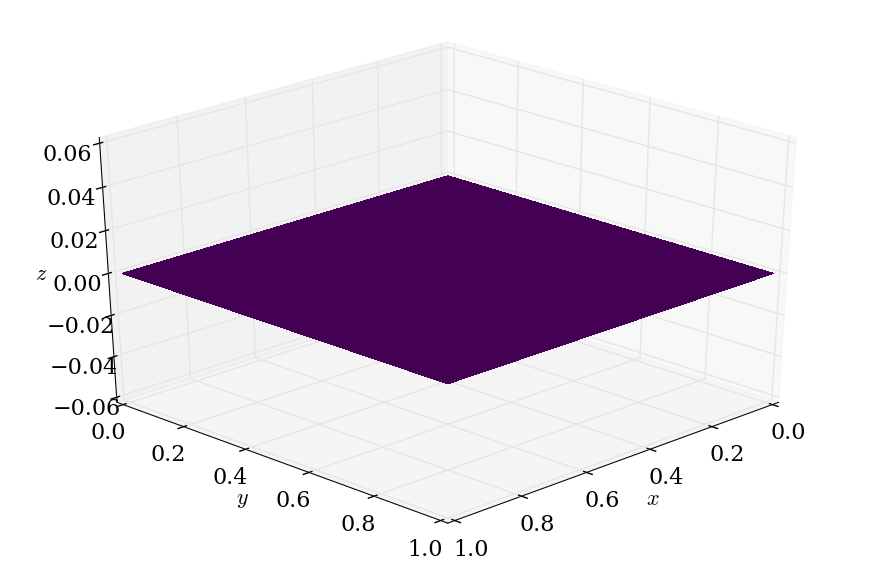

In [61]:
plot_3D(x,y,psi)